In [1]:
K = CyclotomicField(28)

i = K.gen()^7 # == I
j = K.gen()^4 # == e^(2*pi*i/7)

# Симметричная точка
def symm_dot(d: K, d_0: K) -> K:
    return -d+2*d_0


# С изменением этого множества и маленькими
# изменениями везде по коду можно изучать внешние бильярды
# вообще всех выпуклых многоугольников
DOTS = [j^k for k in range(7)]


# нормали всех прямых, ограничивающие области
# а PEP 8 математикам не нужен
NORMALS = {(dot0, dot1): (i*(DOTS[dot0]-DOTS[dot1])).conjugate() for dot0 in range(7) for dot1 in range(7)}


# от значения это функции нужен только знак
# от него зависит положение точки относительно прямой
def hplane(dot0: K, dot1: K, dot: K):
    n = NORMALS[(dot0, dot1)]
    v = dot - DOTS[dot0]
    return CLF(n*v)


# DRY being not so horribly violated
# отображение внешнего бильярда (o_uter b_illiard)
def ob(dot: K) -> K:
    for i in Zmod(7):
        if hplane(i, i+1, dot) < 0 and hplane(i, i-1, dot) < 0:
            return symm_dot(dot, DOTS[i])
    raise NotImplementedError()


# почти обратное отображение
def ob_inv(dot: K) -> K:
    x, y = dot
    for i in Zmod(7):
        if hplane(i, i+1, x, y) > 0 and hplane(i, i-1, x, y) > 0:
            return symm_dot(dot, DOTS[i])
    return dot # ob_inv is for drawing, and b dots have to be on the plot anyway


# находит номер области, соответсвтующий номеру точки, относительно
# которой отражает ob
def locate_dot(dot: K):
    x, y = dot
    for i in Zmod(7):
        if hplane(i, i+1, x, y) > 0 and hplane(i, i-1, x, y) > 0:
            return f"{i}"
    return "B"


# генератор орбиты
# лучше глянуть пример в examples.ipynb
def orbit_ob(d: K, n):
    for _ in range(n):
        yield d
        d = ob(d)


# маршрут
def trace_ob(d: K, n):
    return "".join([locate_dot(i) for i in orbit(d, n)])


def to_k(x, y) -> K:
    return K(x) + i*K(y)

def to_xy(dot: CC):
    return (dot.real(), dot.imag())



In [2]:
from time import time

dot = to_k(1, -1.95)
start = time()
for i in range(10000):
    dot = ob(dot)
print(time() - start)

108.78343439102173


In [49]:
to_xy(CC(j/(j-1)))

(0.500000000000000, -1.03826069828617)

In [47]:
start_dot = to_k(1, -1.95)
dot = start_dot
n = 1
while True:
    dot = ob(dot)
    if dot == start_dot:
        print(n)
        break
    else:
        n += 1
        if n % 10000 == 0:
            print(n)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1232042


In [ ]:
from time import time

start = time()
dot = 4.04 + i*9.21
for d in orbit_ob(K(4.04) + i*K(9.21), 1000000):



In [15]:
K = CyclotomicField(28)

i = K.gen()^7 # == I
j = K.gen()^4 # == e^(2*pi*i/7)

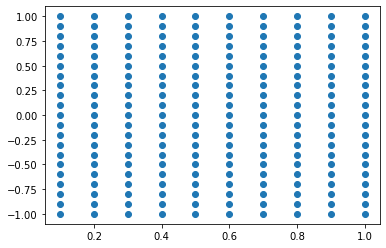

In [29]:
import matplotlib.pyplot as plt

graph = list(map(lambda z: (CC(z).real(), CC(z).imag()), filter(lambda z: CLF(z) > 0, [x+i*y for x in [-1.0,-0.9,..,1.0] for y in [-1.0,-0.9,..,1.0]])))
plt.scatter(*zip(*graph))
plt.show() 

In [40]:
def xy_to_k(x, y) -> K:
    return K(x) + i*K(y)

def k_to_xy(dot: CC):
    return (dot.real(), dot.imag())


k_to_xy(4.04 + i*9.21)

(4.04000000000000, 9.21000000000000)

In [41]:
xy_to_k(4.04, 9.21)

921/100*zeta28^7 + 101/25